In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# the same way we get id from last class
#https://drive.google.com/file/d/1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN/view?usp=sharing
id = "1ag6AcLBsiELNYvlzvfMiXns7WS234Nwj"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('test_new.csv')
id = "1EwNaR0WUYLQhCj_VBJFonUGdnfuf4uuL"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('train_new.csv')

In [ ]:
import pandas as pd
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [ ]:
train_ID = train['ID']
test_ID = test['ID']
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (2051, 81) 
The test data size before dropping Id feature is : (879, 80) 


In [ ]:
y_train = train.iloc[:,-1]
X_train = train.iloc[:,1:-1]
X_test = pd.DataFrame(columns = X_train.columns)
for i in X_test.columns:
    X_test[i] = test[i]
X = pd.concat([X_train, X_test])

In [ ]:
def getObjectColumn(df):
    a = df.dtypes
# print(sum(a == 'object'))
    b = []
    for i in range(len(a)):
        if a[i] == 'object':
            b.append(df.columns[i])
    return b

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop = True), transformed], axis = 1).drop(categories, axis = 1)

categories = getObjectColumn(X_train)
enc_ohe = OneHotEncoder()
enc_ohe.fit(X[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [ ]:
def fillNaWithMean(df):
    for i in df.columns[df.isnull().sum()>0]:
        mean_value = df[i].mean()
        df[i].fillna(value = mean_value, inplace = True)
fillNaWithMean(X_train)
fillNaWithMean(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_train, y_train, test_size=0.06, random_state=5)  #5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Normalization
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time

In [ ]:
patience = 50

early_stop = EarlyStopping(monitor='val_loss',patience=patience)

In [ ]:
act_fn = 'relu'     

In [ ]:
loss = 'huber'

In [ ]:
optimizer = 'adam'

## Neural Net with 3 Layers

In [ ]:
start_time = time.time()
epochs = 500
normalizer = Normalization(axis=-1)
model_dnn = Sequential(normalizer) # scale the input variables
model_dnn.add(Dense(119, activation=act_fn)) #define first dense layer with 119 neurons
model_dnn.add(Dense(50,  activation=act_fn)) #define first dense layer with 50 neurons
model_dnn.add(Dense(25,  activation=act_fn)) #define second dense layer with 25 neurons
model_dnn.add(Dense(1)) # output layer
model_dnn.compile(loss=loss, optimizer=optimizer) # define the loss and optimizer
model_dnn.fit(X_train1,y_train1,validation_data = (X_valid1,y_valid1),epochs=epochs,callbacks=[early_stop]) #fit the model
end_time = time.time()
end_time - start_time

Epoch 1/500
61/61 [==============================] - 1s 5ms/step - loss: 216522.1250 - val_loss: 206735.3438
Epoch 2/500
61/61 [==============================] - 0s 3ms/step - loss: 214994.3438 - val_loss: 202390.4688
Epoch 3/500
61/61 [==============================] - 0s 3ms/step - loss: 202156.2188 - val_loss: 176137.8906
Epoch 4/500
61/61 [==============================] - 0s 3ms/step - loss: 150168.5625 - val_loss: 91339.6406
Epoch 5/500
61/61 [==============================] - 0s 3ms/step - loss: 62249.5977 - val_loss: 38757.9570
Epoch 6/500
61/61 [==============================] - 0s 3ms/step - loss: 38812.5977 - val_loss: 26432.8984
Epoch 7/500
61/61 [==============================] - 0s 6ms/step - loss: 29861.7090 - val_loss: 22620.4434
Epoch 8/500
61/61 [==============================] - 0s 7ms/step - loss: 26113.0977 - val_loss: 21348.6426
Epoch 9/500
61/61 [==============================] - 0s 7ms/step - loss: 24261.2793 - val_loss: 20271.9102
Epoch 10/500
61/61 [==========

47.36688280105591

In [ ]:
model_dnn.evaluate(X_valid1,y_valid1) 

13/13 [==============================] - 0s 3ms/step - loss: 15750.8320


15750.83203125

In [ ]:
y_pred_nn3 = model_dnn.predict(X_valid1)

In [ ]:
y_pred_nn3_1 = model_dnn.predict(X_test)
from numpy import savetxt
savetxt('aa.csv', y_pred_nn3_1, delimiter=',')

Text(0.5, 1.0, 'NeuralNet Test data')

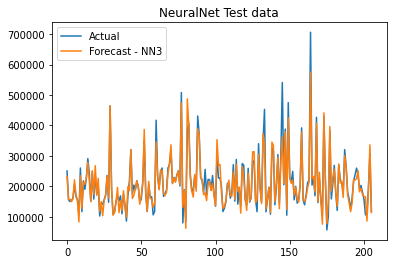

In [ ]:
X_grid = np.arange(len(X_valid1))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,y_valid1)
#plt.xlabel('date')
plt.plot(X_grid,y_pred_nn3)
plt.legend(('Actual','Forecast - NN3'))
plt.title('NeuralNet Test data')
#plt.savefig('NeuralNet Test')

In [ ]:
epochs = 500
normalizer = Normalization(axis=-1)
model_dnn4 = Sequential(normalizer) # scale the input variables
model_dnn4.add(Dense(119, activation=act_fn)) 
model_dnn4.add(Dense(50, activation=act_fn))
model_dnn4.add(Dense(25, activation=act_fn))
model_dnn4.add(Dense(12, activation=act_fn))
model_dnn4.add(Dense(1)) # output layer
model_dnn4.compile(loss=loss, optimizer=optimizer) # define the loss and optimizer
model_dnn4.fit(X_train1,y_train1,validation_data = (X_valid1,y_valid1),epochs=epochs,callbacks=[early_stop]) #fit the model

Epoch 1/500
61/61 [==============================] - 1s 6ms/step - loss: 216764.4062 - val_loss: 203639.9688
Epoch 2/500
61/61 [==============================] - 0s 3ms/step - loss: 212315.7500 - val_loss: 188923.8125
Epoch 3/500
61/61 [==============================] - 0s 3ms/step - loss: 158016.3125 - val_loss: 67247.6875
Epoch 4/500
61/61 [==============================] - 0s 3ms/step - loss: 50560.2852 - val_loss: 29536.3848
Epoch 5/500
61/61 [==============================] - 0s 3ms/step - loss: 31217.0117 - val_loss: 22117.3457
Epoch 6/500
61/61 [==============================] - 0s 3ms/step - loss: 25395.1660 - val_loss: 20824.7500
Epoch 7/500
61/61 [==============================] - 0s 3ms/step - loss: 23102.4941 - val_loss: 19352.3184
Epoch 8/500
61/61 [==============================] - 0s 3ms/step - loss: 21562.3535 - val_loss: 18513.6680
Epoch 9/500
61/61 [==============================] - 0s 3ms/step - loss: 20373.9082 - val_loss: 17928.6504
Epoch 10/500
61/61 [============

In [ ]:
model_dnn4.evaluate(X_valid1,y_valid1) 

1/1 [==============================] - 0s 58ms/step - loss: 0.0123


0.01233638171106577

In [ ]:
y_pred_nn4 = model_dnn4.predict(X_valid1)

In [ ]:
y_pred_nn4 = model_dnn4.predict(X_test)
from numpy import savetxt
savetxt('aa.csv', y_pred_nn4, delimiter=',')

Text(0.5, 1.0, 'NeuralNet Test data')

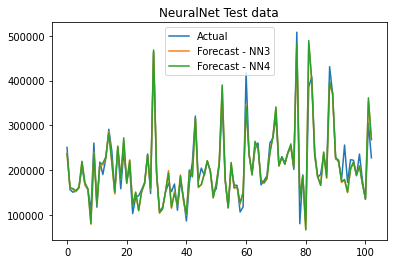

In [ ]:
X_grid = np.arange(len(X_valid1))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,y_valid1)
#plt.xlabel('date')
#plt.plot(X_grid,y_pred_nn1)
plt.plot(X_grid,y_pred_nn3)
plt.plot(X_grid,y_pred_nn4)
plt.legend(('Actual','Forecast - NN3', 'Forecast - NN4'))
plt.title('NeuralNet Test data')
#plt.savefig('NeuralNet Test')

In [ ]:
epochs = 500
normalizer = Normalization(axis=-1)
model_dnn5 = Sequential(normalizer) # scale the input variables
model_dnn5.add(Dense(150, activation=act_fn)) 
model_dnn5.add(Dense(119, activation=act_fn)) 
model_dnn5.add(Dense(50, activation=act_fn))
model_dnn5.add(Dense(25, activation=act_fn))
model_dnn5.add(Dense(12, activation=act_fn))
model_dnn5.add(Dense(1)) # output layer
model_dnn5.compile(loss=loss, optimizer=optimizer) # define the loss and optimizer
model_dnn5.fit(X_train1,y_train1,validation_data = (X_valid1,y_valid1),epochs=epochs,callbacks=[early_stop]) #fit the model

Epoch 1/500
61/61 [==============================] - 1s 7ms/step - loss: 216695.8438 - val_loss: 202890.8594
Epoch 2/500
61/61 [==============================] - 0s 4ms/step - loss: 185711.7031 - val_loss: 72247.3281
Epoch 3/500
61/61 [==============================] - 0s 4ms/step - loss: 46290.2070 - val_loss: 23843.5527
Epoch 4/500
61/61 [==============================] - 0s 4ms/step - loss: 26041.0566 - val_loss: 20347.3125
Epoch 5/500
61/61 [==============================] - 0s 4ms/step - loss: 21990.6875 - val_loss: 18598.3398
Epoch 6/500
61/61 [==============================] - 0s 3ms/step - loss: 19996.1855 - val_loss: 17925.0195
Epoch 7/500
61/61 [==============================] - 0s 4ms/step - loss: 18645.8242 - val_loss: 17355.1133
Epoch 8/500
61/61 [==============================] - 0s 4ms/step - loss: 17535.3105 - val_loss: 17298.6152
Epoch 9/500
61/61 [==============================] - 0s 3ms/step - loss: 16885.3242 - val_loss: 16974.3184
Epoch 10/500
61/61 [==============

In [ ]:
y_pred_nn5 = model_dnn5.predict(X_valid1)

In [ ]:
y_pred_nn5 = model_dnn5.predict(X_test)
from numpy import savetxt
savetxt('aa.csv', y_pred_nn5, delimiter=',')

Text(0.5, 1.0, 'NeuralNet Test data')

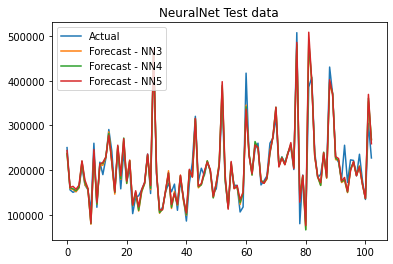

In [ ]:
X_grid = np.arange(len(X_valid1))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,y_valid1)
#plt.xlabel('date')
#plt.plot(X_grid,y_pred_nn1)
plt.plot(X_grid,y_pred_nn3)
plt.plot(X_grid,y_pred_nn4)
plt.plot(X_grid,y_pred_nn5)
plt.legend(('Actual','Forecast - NN3', 'Forecast - NN4', 'Forecast - NN5'))
plt.title('NeuralNet Test data')
#plt.savefig('NeuralNet Test')

In [ ]:
epochs = 500
normalizer = Normalization(axis=-1)
model_dnn6 = Sequential(normalizer) # scale the input variables
model_dnn6.add(Dense(150, activation=act_fn)) 
model_dnn6.add(Dense(119, activation=act_fn)) 
model_dnn6.add(Dense(50, activation=act_fn))
model_dnn6.add(Dense(25, activation=act_fn))
model_dnn6.add(Dense(12, activation=act_fn))
model_dnn6.add(Dense(6, activation=act_fn))
model_dnn6.add(Dense(1)) # output layer
model_dnn6.compile(loss=loss, optimizer=optimizer) # define the loss and optimizer
model_dnn6.fit(X_train1,y_train1,validation_data = (X_valid1,y_valid1),epochs=epochs,callbacks=[early_stop]) #fit the model

Epoch 1/500
58/58 [==============================] - 1s 6ms/step - loss: 216208.5625 - val_loss: 210250.6250
Epoch 2/500
58/58 [==============================] - 0s 4ms/step - loss: 162297.6875 - val_loss: 67585.2500
Epoch 3/500
58/58 [==============================] - 0s 4ms/step - loss: 41507.8945 - val_loss: 27347.8535
Epoch 4/500
58/58 [==============================] - 0s 4ms/step - loss: 24853.9824 - val_loss: 23435.3809
Epoch 5/500
58/58 [==============================] - 0s 4ms/step - loss: 21249.7383 - val_loss: 21896.0430
Epoch 6/500
58/58 [==============================] - 0s 4ms/step - loss: 19153.6875 - val_loss: 20358.0625
Epoch 7/500
58/58 [==============================] - 0s 4ms/step - loss: 17611.0332 - val_loss: 19387.1094
Epoch 8/500
58/58 [==============================] - 0s 4ms/step - loss: 16701.1934 - val_loss: 18871.2402
Epoch 9/500
58/58 [==============================] - 0s 4ms/step - loss: 15842.3428 - val_loss: 18151.9023
Epoch 10/500
58/58 [==============

In [ ]:
y_pred_nn6 = model_dnn6.predict(X_valid1)

In [ ]:
y_pred_nn6 = model_dnn6.predict(X_test)
from numpy import savetxt
savetxt('aa.csv', y_pred_nn6, delimiter=',')

Text(0.5, 1.0, 'NeuralNet Test data')

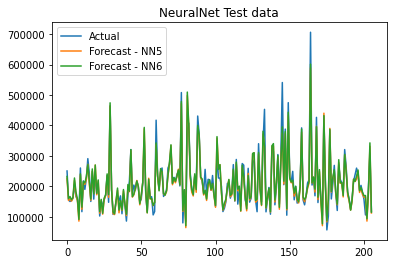

In [ ]:
X_grid = np.arange(len(X_valid1))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,y_valid1)
#plt.xlabel('date')
plt.plot(X_grid,y_pred_nn5)
plt.plot(X_grid,y_pred_nn6)
plt.legend(('Actual', 'Forecast - NN5', 'Forecast - NN6'))
plt.title('NeuralNet Test data')
#plt.savefig('NeuralNet Test')